In [10]:
%matplotlib inline
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

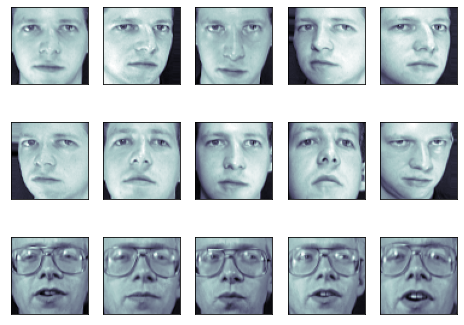

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))

for i in range(15):
  ax = fig.add_subplot(3,5, i+1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=136)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [13]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         4
           3       0.33      0.33      0.33         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       1.00      0.60      0.75         5
           7       1.00      0.25      0.40         4
           8       1.00      0.50      0.67         4
           9       0.50      0.67      0.57         3
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.67      0.67      0.67         3
          16       0.00      0.00      0.00         1
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

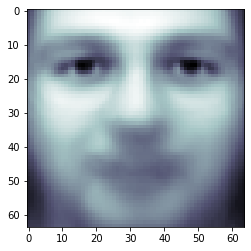

In [15]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),

cmap=plt.cm.bone)

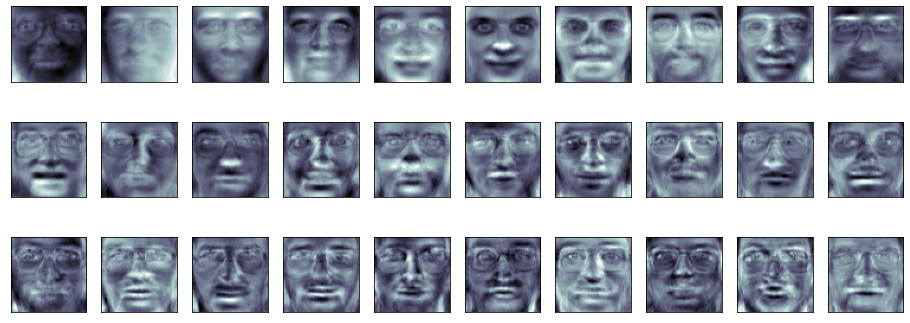

In [16]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),

cmap=plt.cm.bone)

In [17]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

Text(0.5, 1.0, '30')

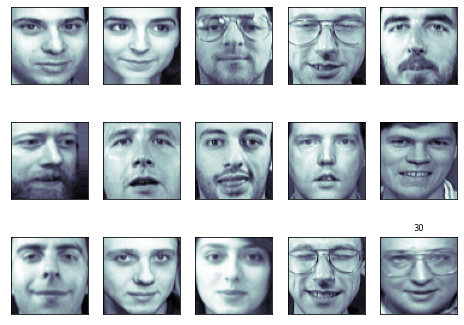

In [19]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),

cmap=plt.cm.bone)

y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
color = ('black' if y_pred == y_test[i] else 'red')
ax.set_title(y_pred, fontsize='small', color=color)

In [20]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         4
           3       0.43      1.00      0.60         3
           4       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         2
           6       1.00      0.80      0.89         5
           7       1.00      0.75      0.86         4
           8       1.00      0.25      0.40         4
           9       0.60      1.00      0.75         3
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      0.67      0.80         3
          16       0.50      1.00      0.67         1
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

faces = datasets.fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=136)
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)

print(metrics.classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         4
           3       0.33      0.33      0.33         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       1.00      0.60      0.75         5
           7       1.00      0.25      0.40         4
           8       1.00      0.50      0.67         4
           9       0.50      0.67      0.57         3
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.67      0.67      0.67         3
          16       0.00      0.00      0.00         1
          17       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Run PCA on IRIS dataset. Visualise the output in
2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations.

In [22]:
from sklearn import datasets

data = datasets.load_iris()
features = data.data
data.data.shape

(150, 4)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=136)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [24]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train)

PCA(n_components=2, whiten=True)

In [25]:
print(pca.components_.shape)

(2, 4)


In [26]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(112, 2)


In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [28]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87      0.90        15
           2       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)

print(metrics.classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = datasets.load_iris()
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('gnb', GaussianNB())])
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=136)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

# precision = precision_score(y_test, y_pred, average=None)
# recall = recall_score(y_test, y_pred, average=None)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )
# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
print(metrics.classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



4. Replace Naive Bayes Classifier with Decision Tree Classifier and then Support Vector Machine and compare performance of all three of them.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split

data = datasets.load_iris()
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('dt', tree.DecisionTreeClassifier(criterion='entropy',max_depth=5))])
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=94)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

# precision = precision_score(y_test, y_pred, average=None)
# recall = recall_score(y_test, y_pred, average=None)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )
# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
print(metrics.classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 13  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87      0.90        15
           2       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



Support Vector Machine

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

data = datasets.load_iris()
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('svc', SVC(kernel='linear', random_state=0))])
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=136)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

# precision = precision_score(y_test, y_pred, average=None)
# recall = recall_score(y_test, y_pred, average=None)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )
# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
print(metrics.classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 14  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

